In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
if cwd.endswith('figure_generation'):
    cwd_prime = os.path.abspath(os.path.join(cwd, '..'))
    os.chdir(cwd_prime)

print(cwd)
from constants.colors import colors
from helpers.interpolate_extinction_coeffs import extinction_coeffs

/home/sebastian/Projects/mcml-analysis/figure_generation


[ 429  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  470
  471  472  473  474  475  476  477  478  479  480  481  482  483  484
  485  486  487  488  489  490  491  492  493  494  495  496  497  498
  499  500  501  502  503  504  505  506  507  508  509  510  511  512
  513  514  515  516  517  518  519  520  521  522  523  524  525  526
  527  528  529  530  531  532  533  534  535  536  537  538  539  540
  541  542  543  544  545  546  547  548  549  550  551  552  553  554
  555  556  557  558  559  560  561  562  563  564  565  566  567  568
  569  570  571  572  573  574  575  576  577  578  579  580  581  582
  583  584  585  586  587  588  589  590  591  592  593  594  595  596
  597  598  599  600  601  602  603  604  605  606  607  608  609  610
  611  612  613  614  615  616  617  618  619  620  621  622  623  624
  625 

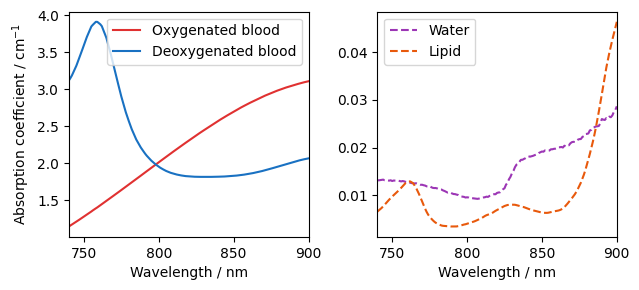

In [2]:
water_mol_per_liter = 55.5
blood_mol_per_liter = 150 / 64458 # gL-1 / gmol-1

wls = np.arange(740, 901, 1)
_, coeffs = extinction_coeffs(wls)

melanosomes_coeff = 519*(wls/500)**-3

names = ['Water', 'Oxygenated blood', 'Deoxygenated blood', 'Lipid']
factors = [water_mol_per_liter, blood_mol_per_liter, blood_mol_per_liter, 1]
ax_is = [1, 0, 0, 1]
line_colors = [colors['grape'][8], colors['red'][8], colors['blue'][8], colors['orange'][8]]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6.5,3), sharex='all')

for name, factor, ax_i, color, coeff in zip(names, factors, ax_is, line_colors, np.concatenate([coeffs, [melanosomes_coeff]])):
    linestyle = '-' if ax_i == 0 else '--'
    axs[ax_i].plot(wls, factor*coeff, label=name, color=color, linestyle=linestyle)

for ax in axs:
    ax.legend()
    ax.set_xlim((min(wls), max(wls)))
    ax.set_xlabel('Wavelength / nm')
axs[0].set_ylabel(r'Absorption coefficient / cm$^{-1}$')
plt.tight_layout()

print(os.getcwd())
plt.savefig('./figure_generation/figures/extinction_coefficients.png', dpi=600, transparent=True)
plt.savefig('./figure_generation/figures/extinction_coefficients.pdf', dpi=600, transparent=True)
plt.show()